In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import time
import csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

from matplotlib import transforms

from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn import metrics

In [3]:
# To Read out 100 rows rather than the default value. 
pd.set_option('display.max_rows', 1000)

In [4]:
#filenames = glob('D:\Spring 2019\DS 440\Data\kplr_dr25_inj*.csv')
#df = pd.concat([pd.read_csv(f) for f in filenames], ignore_index = True)
df = pd.read_csv('D:\Spring 2019\DS 440\Data\kplr_dr25_inj1_plti.csv', header = 0)

print('Size: ')
print(df.shape)

Size: 
(146294, 25)


In [5]:
'''
plti_inj1 = pd.read_csv('D:\Spring 2019\DS 440\Data\kplr_dr25_inj1_plti.csv', header = 0)
plti_inj2 = pd.read_csv('D:\Spring 2019\DS 440\Data\kplr_dr25_inj2_plti.csv', header = 0)
plti_inj3 = pd.read_csv('D:\Spring 2019\DS 440\Data\kplr_dr25_inj3_plti.csv', header = 0)

print('"kplr_dr25_inj1_plti" Size: ')
print(plti_inj1.shape)

print('\n"kplr_dr25_inj2_plti" Size: ')
print(plti_inj2.shape)

print('\n"kplr_dr25_inj3_plti" Size: ')
print(plti_inj3.shape)
'''

'\nplti_inj1 = pd.read_csv(\'D:\\Spring 2019\\DS 440\\Data\\kplr_dr25_inj1_plti.csv\', header = 0)\nplti_inj2 = pd.read_csv(\'D:\\Spring 2019\\DS 440\\Data\\kplr_dr25_inj2_plti.csv\', header = 0)\nplti_inj3 = pd.read_csv(\'D:\\Spring 2019\\DS 440\\Data\\kplr_dr25_inj3_plti.csv\', header = 0)\n\nprint(\'"kplr_dr25_inj1_plti" Size: \')\nprint(plti_inj1.shape)\n\nprint(\'\n"kplr_dr25_inj2_plti" Size: \')\nprint(plti_inj2.shape)\n\nprint(\'\n"kplr_dr25_inj3_plti" Size: \')\nprint(plti_inj3.shape)\n'

In [6]:
temp_df = df.iloc[:, 0:15]
df_drop = temp_df[temp_df.isnull().any(axis=1)]
temp_df = temp_df.drop(df_drop.index.values)
print(temp_df.shape)

X = temp_df.iloc[:, 1:14]
Y = temp_df.iloc[:, 14]
cols_indices = X.columns

(146257, 15)


In [7]:
'''
df['Disp'] = df['Disp'].replace('PC', 1)
df['Disp'] = df['Disp'].replace('FP', 0)

X = df.iloc[:,10:25]
Y = df.iloc[:,2]
'''

"\ndf['Disp'] = df['Disp'].replace('PC', 1)\ndf['Disp'] = df['Disp'].replace('FP', 0)\n\nX = df.iloc[:,10:25]\nY = df.iloc[:,2]\n"

In [8]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 350, num = 5)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 2, stop = 30, num = 10)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Minimum number of neighbors required for each node
n_neighbors = [int(x) for x in np.linspace(start = 3, stop = 30, num = 10)]

# Minimum Power parameter required for the Minkowski metric
p = [float(x) for x in np.linspace(start = 1, stop = 5, num = 10)]

knc = KNeighborsClassifier() #n_neighbors, p
abc = AdaBoostClassifier() #n_estimators
xgb = XGBClassifier() #n_estimators, max_depth
dtc = DecisionTreeClassifier() #max_depth, min_samples_split, min_samples_leaf
etc = ExtraTreesClassifier() #n_estimators, max_depth, min_samples_split, min_samples_leaf
rfc = RandomForestClassifier() #n_estimators, max_depth, min_samples_split, min_samples_leaf
gbc = GradientBoostingClassifier() #n_estimators, max_depth, min_samples_split, min_samples_leaf

kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 7)

In [ ]:
# Create the param grid
param_grid = dict(n_neighbors = n_neighbors,
                  p = p)

print('KNeighbors Classifier')
knc_grid_search = GridSearchCV(knc, param_grid, scoring = 'accuracy', n_jobs = -1, cv = kfold, verbose = 1)
knc_grid_result = knc_grid_search.fit(X, Y)

# Updating the param grid
param_grid = dict(n_estimators = n_estimators)

print('AdaBoost Classifier')
abc_grid_search = GridSearchCV(abc, param_grid, scoring = 'accuracy', n_jobs = -1, cv = kfold, verbose = 1)
abc_grid_result = abc_grid_search.fit(X, Y)

# Updating the param grid
param_grid = dict(n_estimators = n_estimators,
                  max_depth = max_depth)

print('XGBoost Classifier')
xgb_grid_search = GridSearchCV(xgb, param_grid, scoring = 'accuracy', n_jobs = -1, cv = kfold, verbose = 1)
xgb_grid_result = xgb_grid_search.fit(X, Y)

# Updating the param grid
param_grid = dict(max_depth = max_depth,
                  min_samples_split = min_samples_split,
                  min_samples_leaf = min_samples_leaf)

print('DecisionTree Classifier')
dtc_grid_search = GridSearchCV(dtc, param_grid, scoring = 'accuracy', n_jobs = -1, cv = kfold, verbose = 1)
dtc_grid_result = dtc_grid_search.fit(X, Y)

# Updating the param grid
param_grid = dict(n_estimators = n_estimators,
                  max_depth = max_depth,
                  min_samples_split = min_samples_split,
                  min_samples_leaf = min_samples_leaf)

print('ExtraTrees Classifier')
etc_grid_search = GridSearchCV(etc, param_grid, scoring = 'accuracy', n_jobs = -1, cv = kfold, verbose = 1)
etc_grid_result = etc_grid_search.fit(X, Y)

print('RandomForest Classifier')
rfc_grid_search = GridSearchCV(rfc, param_grid, scoring = 'accuracy', n_jobs = -1, cv = kfold, verbose = 1)
rfc_grid_result = rfc_grid_search.fit(X, Y)

print('GradientBoosting Classifier')
gbc_grid_search = GridSearchCV(gbc, param_grid, scoring = 'accuracy', n_jobs = -1, cv = kfold, verbose = 1)
gbc_grid_result = gbc_grid_search.fit(X, Y)

KNeighbors Classifier
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 107.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 233.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 320.2min finished


AdaBoost Classifier
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 14.0min finished


XGBoost Classifier
Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 235.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 1265.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 1693.1min finished


DecisionTree Classifier
Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 10.8min finished


ExtraTrees Classifier
Fitting 10 folds for each of 450 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 70.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 117.7min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 191.7min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 289.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 419.0min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed: 497.1min finished


RandomForest Classifier
Fitting 10 folds for each of 450 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 94.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 189.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 335.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 546.5min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 816.8min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 1147.9min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed: 1336.0min finished


GradientBoosting Classifier
Fitting 10 folds for each of 450 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 119.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 287.7min


In [ ]:
# plot results
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, len(max_depth)))))
plt.figure(figsize = (19.20, 10.80), dpi = 300)
plt.tight_layout()

scores = np.array(means).reshape(len(p), len(n_neighbors))
for i, value in enumerate(p):
    plt.plot(n_neighbors, scores[i], label='p: ' + str(round(value, 2)))
plt.legend(fontsize = 12)
plt.xlabel('n_neighbors', fontsize=20)
plt.xticks(fontsize = 20)
plt.ylabel('Accuracy', fontsize=20)
plt.yticks(fontsize = 20)
plt.savefig('knc - n_neighbors_vs_p.jpg', dpi = 300, bbox_inches='tight')

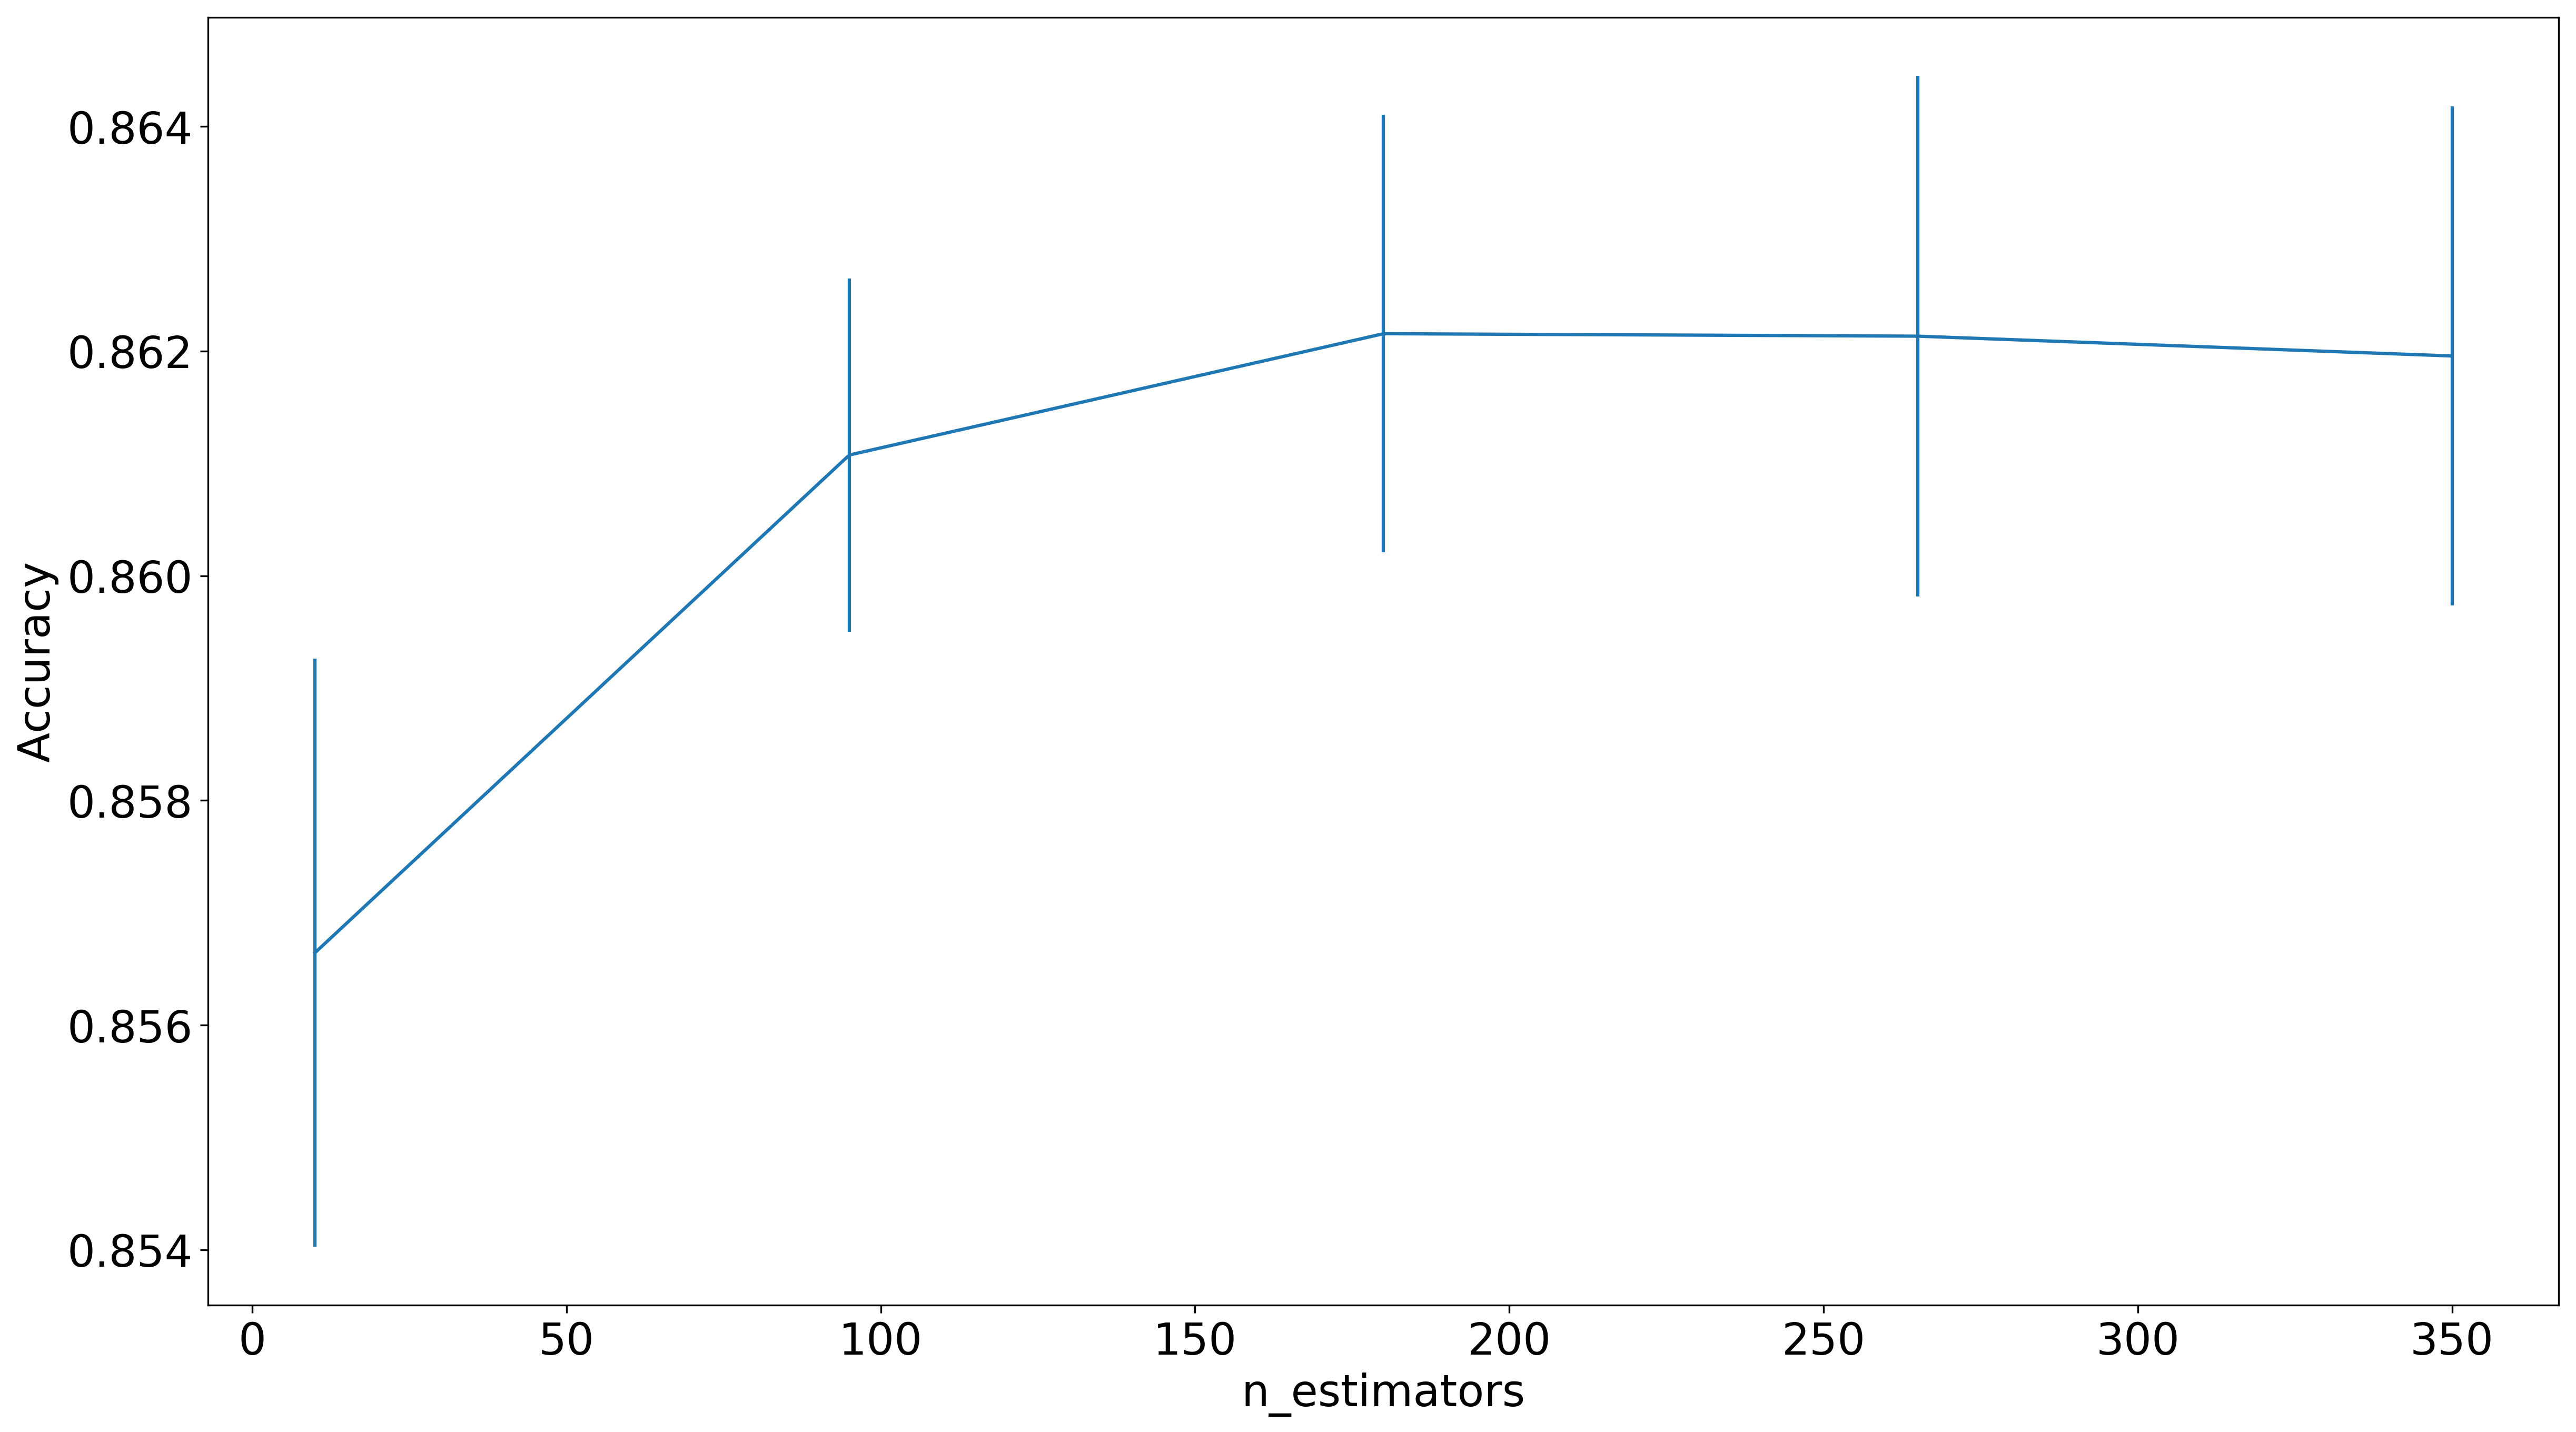

In [10]:
# plot results
plt.figure(figsize = (19.20, 10.80), dpi = 300)
plt.tight_layout()

plt.errorbar(n_estimators, means, yerr=stds)
plt.xlabel('n_estimators', fontsize=20)
plt.xticks(fontsize = 20)
plt.ylabel('Accuracy', fontsize=20)
plt.yticks(fontsize = 20)
plt.savefig('abc - n_estimators.jpg', dpi = 300, bbox_inches='tight')

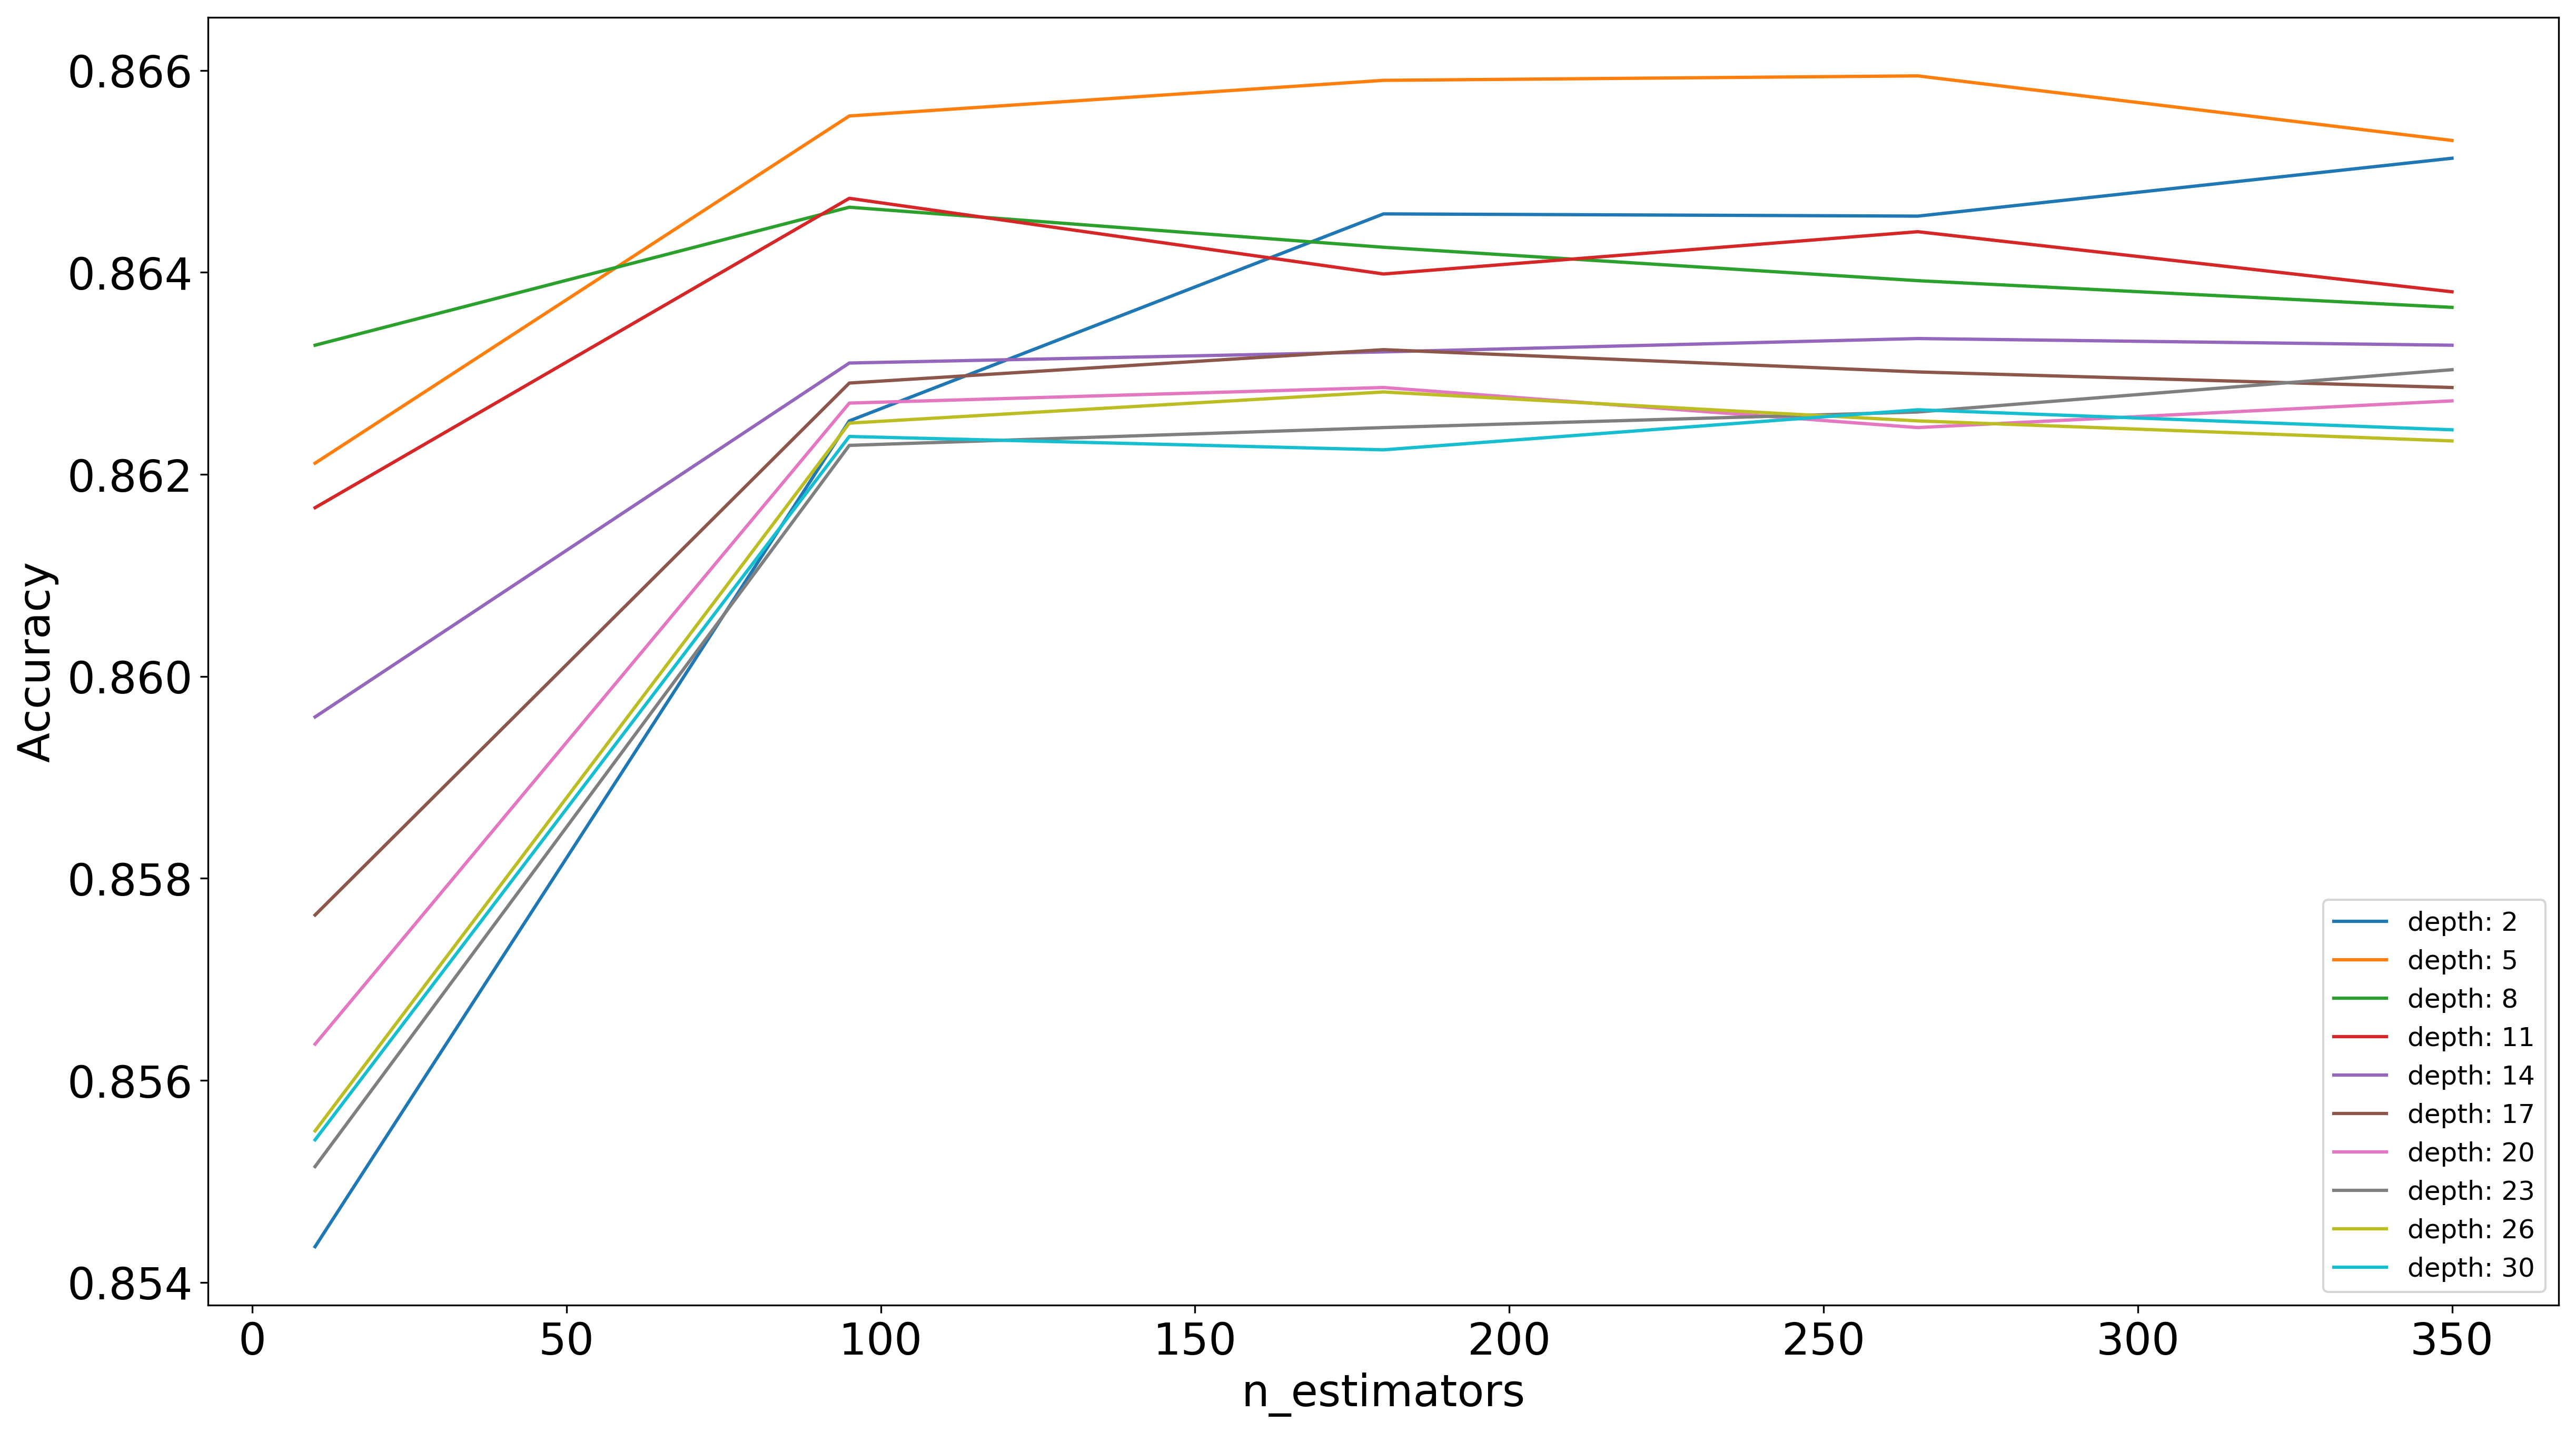

In [10]:
# plot results
plt.figure(figsize = (19.20, 10.80), dpi = 300)
plt.tight_layout()

scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend(loc = 'lower right', fontsize = 12)
plt.xlabel('n_estimators', fontsize=20)
plt.xticks(fontsize = 20)
plt.ylabel('Accuracy', fontsize=20)
plt.yticks(fontsize = 20)
plt.savefig('xgb - n_estimators_vs_max_depth.jpg', dpi = 300, bbox_inches='tight')

In [ ]:
# Summarize results
print("Best: %f using %s" % (gbc_grid_result.best_score_, gbc_grid_result.best_params_))
means = gbc_grid_result.cv_results_['mean_test_score']
stds = gbc_grid_result.cv_results_['std_test_score']
params = gbc_grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))